In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [122]:

df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
df.head()

,River,W,S,Q,U,H,D50,D84,R,qs
0,Bogardi1,0.300,0.0104,0.02747,1.06,0.087,0.0068,0.00816,0.0721,24.1
1,Bogardi1,0.300,0.0141,0.01566,0.92,0.057,0.0068,0.00816,0.0504,6.1
2,Bogardi1,0.823,0.0143,0.02288,0.69,0.040,0.0068,0.00816,0.0389,0.2
3,Bogardi1,0.823,0.0145,0.04978,0.82,0.074,0.0068,0.00816,0.0709,21.9
4,Bogardi1,0.823,0.0153,0.03582,0.78,0.056,0.0068,0.00816,0.0535,1.8


In [123]:
X=df.loc[:, [ 'H','S','Q','D50','D84','R']].values
y=df.loc[:, [ 'qs']].values

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(X)
X1 = scaler1.transform(X)
scaler2 = MinMaxScaler().fit(y)
y1 = scaler2.transform(y)


In [125]:

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
y_train=y_train.ravel()
y_test=y_test.ravel()


In [126]:
svr_rbf = SVR(kernel="rbf", C=2.96770348e+02, gamma='scale', epsilon=0.001)
md=svr_rbf.fit(X_train,y_train)


In [127]:
y_pred = svr_rbf.predict(X_test)

In [128]:

def calculate_nse(y_test, y_pred):
    mean_observed = np.mean(y_test)
    numerator = np.sum((y_test - y_pred) ** 2)
    denominator = np.sum((y_test - mean_observed) ** 2)
    nse = 1 - (numerator / denominator)
    return nse


In [129]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
nse = calculate_nse(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r_squared)
print('Normalized Standard Error:', nse)


MSE: 0.0007455337083600327
RMSE: 0.027304463158246358
MAE: 0.006445631682972124
R^2: 0.9434723670333005
Normalized Standard Error: 0.9434723670333005


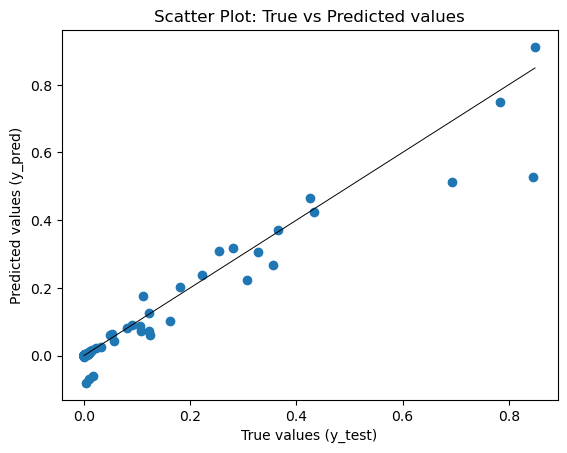

In [130]:
import matplotlib.pyplot as plt
# Scatter plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linewidth=0.7)
plt.xlabel('True values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Scatter Plot: True vs Predicted values')
plt.show()